# Metody Numeryczne
## Układy o dużym wymiarze
### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Problem z O($m^3$)
- W praktyce obsługiwanie macierzy dla dużych m robi się kłopotliwe.
- Przykładowo Python nie radzi sobie z układami więcej niż tysięcy równań (brak pamięci)
- W zastosowaniach, mamy macierze o m=$10^5$, ale np. mających nie więcej niż 10 niezerowych elementów na wiersz.

In [1]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib.pyplot as plt
import scipy.sparse.linalg


## Macierze rzadkie
W dużych rzeczywistych problemach, ilość danych jest na tyle duża, że nie zapisuje się macierzy
w pamięci wprost


In [2]:
np.random.seed(12345)
matrixSize = 500
A=2*np.random.rand(matrixSize,matrixSize)-1
A=(A+A.T)/2
np.fill_diagonal(A, 1)
A[A < 0.95] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)

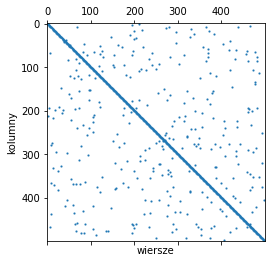

In [3]:
plt.spy(spA,markersize=1)
plt.xlabel('wiersze')
plt.ylabel('kolumny')
plt.show()


## Macierze rzadkie
Istnieje wiele sposobów zapisu:

- Dictionary of Keys – odwzorowanie (wiersz, kolumna)->wartość (dobry do tworzenia macierzy)
- Lista list (LIL) (np. kolumnami)
- Współrzędne i wartość (COO), sortowane po wierszach a następnie kolumnach
- Format Yale (Compressed sparse row) (trzy macierze jednowymiarowe)
    

## Macierze rzadkie
   
- Wykorzystuje się symetrię macierzy (trzeba zapisać tylko połowę danych)
- Wykorzystuje się strukturę, macierze Hessenberga, Pasmowe,  

$$
B=
\begin{bmatrix}
b_{11}&b_{12}&0&\dots&\dots&0\\
b_{21}&b_{22}&b_{22}&\ddots&\ddots&\vdots\\
0&b_{32}&b_{33}&b_{34}&\ddots&\vdots\\
\vdots&\ddots&b_{43}&b_{44}&b_{45}&0\\
\vdots&\ddots&\ddots&b_{54}&b_{55}&b_{56}\\
0&\dots&\dots&0&b_{65}&b_{66}
\end{bmatrix}
$$

## Praktyka rozwiązań iteracyjnych

Text(0.85, 0.4, 'Rozwiązanie iteracyjne')

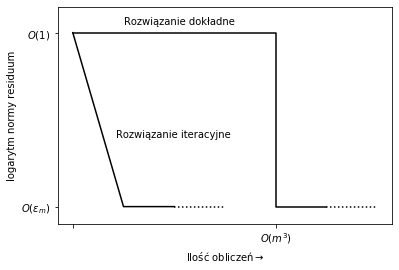

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot([0,4,4,5],[1,1,0,0],c='black')
ax.plot([5,6],[0,0],linestyle=':',c='black')
ax.plot([0,1,2],[1,0,0],c='black')
ax.plot([2,3],[0,0],linestyle=':',c='black')
ax.set_xticks([0,4])
ax.set_xticklabels(['',r'$O(m^3)$'])
ax.set_yticks([0,1])
ax.set_yticklabels([r'$O(\varepsilon_m)$',r'$O(1)$'])
ax.set_xlabel(r'Ilość obliczeń$\rightarrow$')
ax.set_ylabel('logarytm normy residuum')
ax.set_ylim([-0.1,1.15])
ax.text(1,1.05,'Rozwiązanie dokładne')
ax.text(.85,.4,'Rozwiązanie iteracyjne')

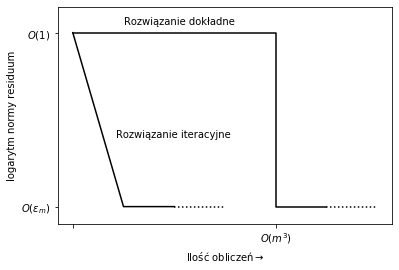

In [5]:
fig

## Szybkie metody dokładne
- Są szybkie metody rozwiązywania układów dokładnie:
    - Algorytm Strassena O($m^{2.807355}$)
    - Algorytm Coppersmitha-Winograda O($m^{2.372}$)
- Są one jednak w zasadzie niepraktyczne
    - Brak informacji o stabilności
    - Strassen poprawia stosunkowo niewiele
    - CW ma tak dużą stałą błędu, że nie widać poprawy w macierzach osiągalnych na obecnym sprzęcie

## Klasyczne metody iteracyjne 

## Układ równań dyskretnych (reukrencyjnych)

$$
G \mathbf{x}^{(k+1)}=H \mathbf{x}^{(k)} +\mathbf{g}
$$

Gdzie $\mathbf{x},\ \mathbf{g}\ \in R^n$, $H,\ G\in R^{m\times m}$
Przy odpowiednich założeniach - $\mathrm{det}(G)\neq0$, $|\lambda(G^{-1}H)|<1$  - ciąg $\mathbf{x}^{(n)}$ jest zbieżny do granicy:
$$
\lim_{n\rightarrow\infty}\mathbf{x}^{(n)} = (G-H)^{-1}\mathbf{g}
$$


## Metoda Jacobiego

Niech $A\mathbf x = \mathbf b$ będzie układem $m$ równań z $m$ niewiadomymi

$$
A=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}, \qquad  \mathbf{x} = \begin{bmatrix} x_{1} \\ x_2 \\ \vdots \\ x_n \end{bmatrix} , \qquad  \mathbf{b} = \begin{bmatrix} b_{1} \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
$$

Macierz $A$ możemy zdekomponować

$$
A=D+L+U \qquad \text{gdzie} \qquad D = \begin{bmatrix} a_{11} & 0 & \cdots & 0 \\ 0 & a_{22} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\0 & 0 & \cdots & a_{nn} \end{bmatrix} ,\  L+U = \begin{bmatrix} 0 & a_{12} & \cdots & a_{1n} \\ a_{21} & 0 & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & 0 \end{bmatrix}
$$

## Metoda Jacobiego
Rozwiązanie układu równań uzyskujemy przez iteracyjne rozwiązywanie
$$
D\mathbf{x}^{(k+1)} = \mathbf{b} - (L+U) \mathbf{x}^{(k)}
$$

ponieważ ciąg ma granicę:

$$
\lim_{n\rightarrow\infty}\mathbf{x}^{(n)} = (D+L+U)^{-1}\mathbf{b}=A^{-1}\mathbf{b}
$$



## Warunki zbieżności

WKW to $|\lambda(D^{-1}(L+U))|<1$, ale jest on trudny do sprawdzenia.

WW jest ścisła diagonalna dominacja:

$$
\left | a_{ii} \right | > \sum_{j \ne i} {\left | a_{ij} \right |}
$$

Dowód przez tw. Gerszgorina

In [6]:
def jacobi(A, b, x_init, epsilon=1e-10, max_iterations=500):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    D_inv = np.diag(1 / np.diag(D))
    resid=[]
    for i in range(max_iterations):
        x_new = np.dot(D_inv, b - np.dot(LU, x))
        r_norm = np.linalg.norm(x_new - x)
        resid.append(r_norm)
        if  r_norm< epsilon:
            return x_new,resid
        x = x_new
    return x,resid

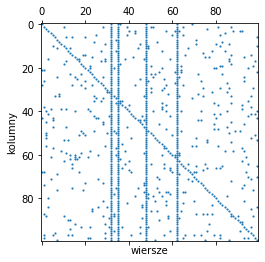

In [7]:
np.random.seed(11)
matrixSize = 100
A=np.random.uniform(0,1,(matrixSize,matrixSize))
A[A < 0.95] = 0
A=A-np.diag(A)+np.diag(1*np.sum(np.abs(A-np.diag(A))+0.1,axis=0))
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
plt.spy(spA,markersize=1)
plt.xlabel('wiersze')
plt.ylabel('kolumny')
plt.show()

def num_list_2str(num_list):
    return ['$'+(format(i,'1.1E')).replace('E+0','\cdot10^{')+'}$' for i in num_list]


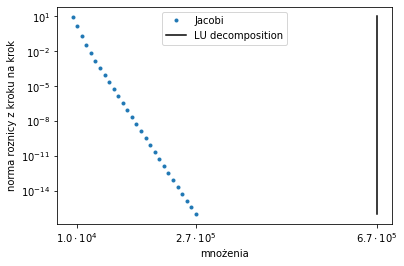

In [8]:
x,resid = jacobi(A,b,x1,2**(-52))
computation= matrixSize**2*np.array([*range(len(resid))])
fig, ax = plt.subplots(1,1)

ax.semilogy(computation,resid,marker='.',linestyle='none',label='Jacobi')
ax.semilogy([2/3*matrixSize**3,2/3*matrixSize**3], [10,1e-16],c='black',label='LU decomposition')
ax.set_xticks([matrixSize**2,max(computation),2/3*matrixSize**3])
ax.set_xticklabels(num_list_2str([matrixSize**2,max(computation),2/3*matrixSize**3]))
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')

ax.legend()

## Przykład działania

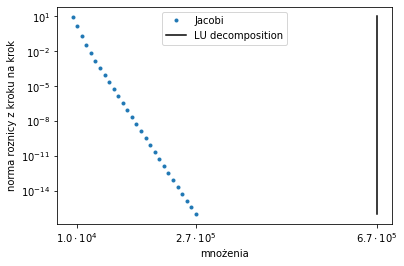

In [9]:
fig

## Metoda Gaussa-Seidla

Niech $A\mathbf x = \mathbf b$ będzie układem $m$ równań z $m$ niewiadomymi

$$
A=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}, \qquad  \mathbf{x} = \begin{bmatrix} x_{1} \\ x_2 \\ \vdots \\ x_n \end{bmatrix} , \qquad  \mathbf{b} = \begin{bmatrix} b_{1} \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
$$

Macierz $A$ możemy zdekomponować

$$
A=L_*+U \qquad \text{gdzie} \qquad L_* = \begin{bmatrix} a_{11} & 0 & \cdots & 0 \\ a_{21} & a_{22} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}, \quad U = \begin{bmatrix} 0 & a_{12} & \cdots & a_{1n} \\ 0 & 0 & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\0 & 0 & \cdots & 0 \end{bmatrix}
$$


## Metoda Gaussa-Seidla
Rozwiązanie układu równań uzyskujemy przez iteracyjne rozwiązywanie
$$
L_*\mathbf{x}^{(k+1)} = \mathbf{b} - U \mathbf{x}^{(k)}
$$

ponieważ ciąg ma granicę:

$$
\lim_{n\rightarrow\infty}\mathbf{x}^{(n)} = (L_*+U)^{-1}\mathbf{b}=A^{-1}\mathbf{b}
$$



## Warunki zbieżności

- diagonalna dominacja
- dodatnia określoność macierzy


In [10]:
def gauss_seidel(A, b, x_init, epsilon=1e-10, max_iterations=500):
    Lg = np.tril(A)
    U = np.triu(A,1)
    x = x_init
    resid=[]
    for i in range(max_iterations):
        x_new = scipy.linalg.solve_triangular(Lg,b-np.dot(U,x))
        r_norm = np.linalg.norm(x_new - x)
        if r_norm<2**(-52):
            r_norm=2**(-53)            
        resid.append(r_norm)
        if  r_norm< epsilon:
            return x_new,resid
        x = x_new
    return x,resid

## Porównanie z metodą Jacobiego

Text(0, 0.5, 'norma roznicy z kroku na krok')

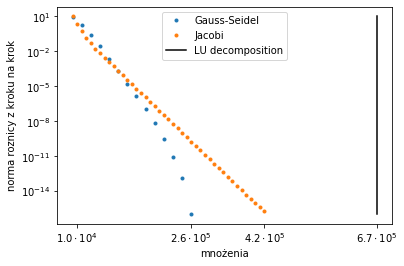

In [11]:

np.random.seed(11)
matrixSize = 100
A=np.random.uniform(0,1,(matrixSize,matrixSize))
A[A < 0.95] = 0
A=A-np.diag(A)+np.diag(.6*np.sum(np.abs(A-np.diag(A))+0.1,axis=0))
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))

x,resid = jacobi(A,b,x1,2**(-52))
computation= matrixSize**2*np.array([*range(len(resid))])
x,resid_gs = gauss_seidel(A,b,x1,2**(-52))
computation_gs= 2*matrixSize**2*np.array([*range(len(resid_gs))])
fig, ax = plt.subplots(1,1)
ax.semilogy(computation_gs,resid_gs,marker='.',linestyle='none',label='Gauss-Seidel')
ax.semilogy(computation,resid,marker='.',linestyle='none',label='Jacobi')
ax.semilogy([2/3*matrixSize**3,2/3*matrixSize**3], [10,1e-16],c='black',label='LU decomposition')
ax.set_xticks([matrixSize**2,max(computation_gs),max(computation),2/3*matrixSize**3])
ax.set_xticklabels(num_list_2str([matrixSize**2,max(computation_gs),max(computation),2/3*matrixSize**3]))
ax.legend()
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')


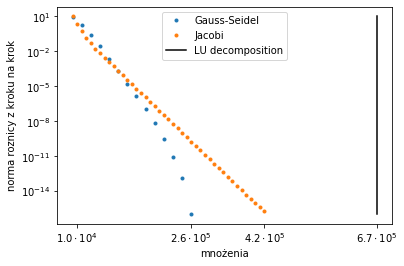

In [12]:
fig

## Macierz dodatnio-określona

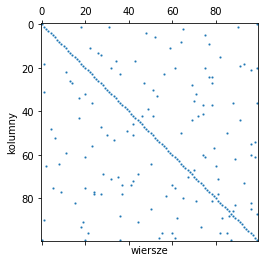

In [13]:
np.random.seed(12345)
matrixSize = 100
np.random.seed(42)
U,_ = np.linalg.qr(np.random.rand(matrixSize,matrixSize))
S = np.diag([*range(1,matrixSize+1)])
A2=U@S@U.T
A2=A2/np.max(A2)

A2[A2 < 0.1] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix(A2)
plt.spy(spA,markersize=1)
plt.xlabel('wiersze')
plt.ylabel('kolumny')
plt.show()

Text(0, 0.5, 'norma roznicy z kroku na krok')

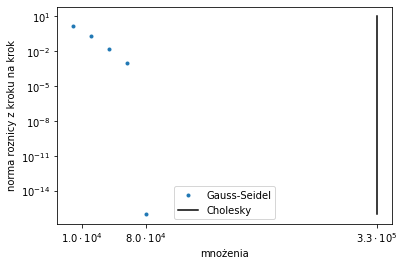

In [14]:
x,resid_gs = gauss_seidel(A2,b,x1,2**(-52))
computation_gs= 2*matrixSize**2*np.array([*range(len(resid_gs))])
fig, ax = plt.subplots(1,1)
ax.semilogy(computation_gs,resid_gs,marker='.',linestyle='none',label='Gauss-Seidel')
ax.semilogy([1/3*matrixSize**3,1/3*matrixSize**3], [10,1e-16],c='black',label='Cholesky')
ax.set_xticks([matrixSize**2,max(computation_gs),1/3*matrixSize**3])
ax.set_xticklabels(num_list_2str([matrixSize**2,max(computation_gs),1/3*matrixSize**3]))
ax.legend()
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')

## Metoda sukcesywnej nadrelaksacji

Niech $A\mathbf x = \mathbf b$ będzie układem $m$ równań z $m$ niewiadomymi

$$
A=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}, \qquad  \mathbf{x} = \begin{bmatrix} x_{1} \\ x_2 \\ \vdots \\ x_n \end{bmatrix} , \qquad  \mathbf{b} = \begin{bmatrix} b_{1} \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
$$

Macierz $A$ możemy zdekomponować

$$
A=D+L+U \qquad \text{gdzie} \qquad D = \begin{bmatrix} a_{11} & 0 & \cdots & 0 \\ 0 & a_{22} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\0 & 0 & \cdots & a_{nn} \end{bmatrix} ,\  L+U = \begin{bmatrix} 0 & a_{12} & \cdots & a_{1n} \\ a_{21} & 0 & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & 0 \end{bmatrix}
$$

A układ równań można przekształcić do postaci

$$
(D+\omega L) \mathbf{x} = \omega \mathbf{b} - [\omega U + (\omega-1) D ] \mathbf{x}
$$
dla $1<\omega<2$ nazywanego współczynnikiem nadrelaksacji.


## Metoda sukcesywnej nadrelaksacji
Rozwiązanie układu równań uzyskujemy przez iteracyjne rozwiązywanie
$$
(D+\omega L)\mathbf{x}^{(k+1)} =  \big(\omega \mathbf{b} - [\omega U + (\omega-1) D ] \mathbf{x}^{(k)}\big)=L_w \mathbf{x}^{(k)}+\mathbf{c}
$$

ponieważ ciąg ma granicę:

$$
\lim_{n\rightarrow\infty}\mathbf{x}^{(n)} = (\omega D + \omega L+ \omega U)^{-1}\mathbf{\omega b}=A^{-1}\mathbf{b}
$$


## Uzasadnienie nadrelaksacji

Nadrelaksacja ma na celu nie tyle poszerzenie klasy zbieżności tylko przyspieszenie zbieżności.

Istnieją wzory analityczne uzależniające zbieżność od wartości własnych macierzy $I-D^{-1} A$, które z tego względu są niepraktyczne do stosowania.

In [15]:
def SOR(A, b,w, x_init, epsilon=1e-10, max_iterations=500):
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U = np.triu(A,1)
    Dw=D+L*w
    Lw=-w*U+(w-1)*D
    c=w*b
    x = x_init
    resid=[]
    for i in range(max_iterations):
        x_new = scipy.linalg.solve_triangular(Dw,c+np.dot(Lw,x))
        r_norm = np.linalg.norm(x_new - x)
        if r_norm<2**(-52):
            r_norm=2**(-53)            
        resid.append(r_norm)
        if  r_norm< epsilon:
            return x_new,resid
        x = x_new
    return x,resid

Text(0, 0.5, 'norma roznicy z kroku na krok')

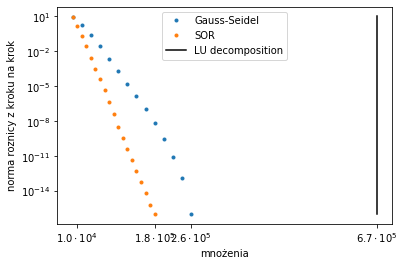

In [16]:
mu=np.max(np.abs(np.linalg.eig(-np.diag(1/np.diag(A2))@A2+np.eye(matrixSize))[0]))
w_opt = lambda mu:1+(mu/(1+np.sqrt(1-mu**2)))**2


x,resid = SOR(A,b,w_opt(mu),x1,2**(-52))
computation= matrixSize**2*np.array([*range(len(resid))])

x,resid_gs = gauss_seidel(A,b,x1,2**(-52))
computation_gs= 2*matrixSize**2*np.array([*range(len(resid_gs))])
fig, ax = plt.subplots(1,1)
ax.semilogy(computation_gs,resid_gs,marker='.',linestyle='none',label='Gauss-Seidel')
ax.semilogy(computation,resid,marker='.',linestyle='none',label='SOR')
ax.semilogy([2/3*matrixSize**3,2/3*matrixSize**3], [10,1e-16],c='black',label='LU decomposition')
ax.set_xticks([matrixSize**2,max(computation_gs),max(computation),2/3*matrixSize**3])
ax.set_xticklabels(num_list_2str([matrixSize**2,max(computation_gs),max(computation),2/3*matrixSize**3]))
ax.legend()
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')

## Porównanie z metodą Gaussa-Seidla

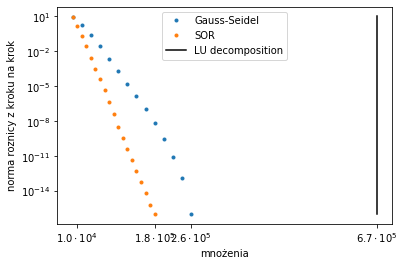

In [17]:
fig

## Metody klasyczne - podsumowanie

- metody wywodzące się z lat 50-tych
- obecnie stosowalne jako tzw. preconditionery


## Metody podprzestrzeni Kryłowa

- W konstrukcji metod iteracyjnych ważną rolę odgrywają podprzestrzenie Kryłowa
- Rozwiązanie jest konstruowane jako pewna kombinacja wektorów postaci 
$$ 
b, Ab, A^2b, A^3b
$$
- Podprzestrzeń skonstruowana z takich wektorów nazywana jest przestrzenią Kryłowa, przy czym:
$$
K_n=\langle b, Ab, A^2b, A^3,\ldots,A^{n-1}b\rangle
$$


## Macierz Hessenberga

Każda macierz $A$ jest ortogonalnie podobna do tzw. macierzy Hessenberga tj.
$$
A=QHQ^*
$$
zaś $H$ ma postać

$$
H = \begin{bmatrix}
h_{11} & h_{12} & h_{13} & \cdots & h_{1m}\\
h_{21} & h_{22} & h_{23} &\cdots & h_{2m}\\
 & h_{32} & h_{33} & \cdots & h_{3m}\\
 &  & \ddots & \ddots & \vdots\\
 &   &  & h_{m,m-1} & h_{mm}
\end{bmatrix}
$$
Złożoność tej operacji to $O(m^3)$

## Iteracja Arnoldiego

Ponieważ dla dużych macierzy pełna dekompozycja jest zbyt kosztowna pomysł polega na rozważeniu pierwszych $n$ kolumn równania $AQ=QH$, jeżeli $Q_n$ to pierwsze $n$ kolumn $Q$ to mamy:
$$
AQ_n=Q_{n+1}H_n
$$
gdzie $H_n$ to lewa górna część macierzy $H$ o wymiarach $(n+1)\times n$ tj.
$$
H_n = \begin{bmatrix}
h_{11} & h_{12} & h_{13} & \cdots & h_{1n}\\
h_{21} & h_{22} & h_{23} &\cdots & h_{2n}\\
 & h_{32} & h_{33} & \cdots & h_{3n}\\
 &  & \ddots & \ddots & \vdots\\
 &   &  & h_{n,n-1} & h_{nn}\\
 &   &  &  & h_{n+1,n}
\end{bmatrix}
$$

## Algortytm GMRES
- Generalized Minimal RESiduals
- Idea algorytmu: W $n$ tym kroku szukamy aproksymacji rozwiązania równania za pomocą wektora $x_n\in K_n$ minmalizując normę residuum $r_n=b-Ax_n$
- Przeformułowanie problemu do problemu najmniejszych kwadratów


## Algorytm GMRES
- Problem przechodzi w formę 
$$x=\mathrm{arg}\min_c\|A K_n c-b\|$$

- Algorytm realizowany jest z wykorzystaniem tzw. Iteracji Arnoldiego, która polega w pewnym sensie na sukcesywnym rozkładu QR do kolumn macierzy $K_n$. To pozwala na przeformułowanie
$$x=\mathrm{arg}\min_y\|A Q_n y-b\|$$
- Specyfika iteracji Arnoldiego pozwala na
$$x=\mathrm{arg}\min_y\|Q_{n+1} H_n y -b\|$$
lub równoważnie
$$x=\mathrm{arg}\min_y\| H_n y -Q^*_{n+1}b\|=\| H_n y -\|b\|e_1\|$$

Ten ostatni problem ma wymiar $n+1 \times n$




In [36]:
np.random.seed(12345)
matrixSize = 1000
A=2*np.random.rand(matrixSize,matrixSize)-1
#A=0.5*(A+A.T)
A=A
np.fill_diagonal(A, 1)
A[A < 0.999] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)

In [37]:
import inspect
#import plotly.express as px
nmax_iter = 1
rstart = 1
tol =  2**(-52)
e = np.zeros((nmax_iter + 1, 1))
rr = 1

class gmres_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      self.callbacks.append(rk)
      self.niter += 1
      if self._disp:
          print('%s' %(str(rk)))
        
class cg_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      res=inspect.currentframe().f_back.f_locals['resid'] 
      self.callbacks.append(res)
      self.niter += 1
      if self._disp:
          print('%s' %(str(res)))    

In [38]:
counter = gmres_counter()
x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol, 
                                    callback=counter)


Text(0, 0.5, 'norma roznicy z kroku na krok')

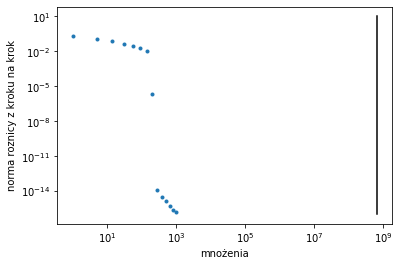

In [39]:
fig,ax = plt.subplots(1,1)
computation = np.cumsum(np.array([*range(0,counter.niter)])**2)

ax.loglog(computation,counter.callbacks,linestyle='none',marker='.')
ax.loglog([2/3*matrixSize**3,2/3*matrixSize**3], [10,1e-16],c='black',label='LU decomposition')
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')

# Minimum formy kwadratowej 
Dla formy kwadratowej z półdodatnio określoną macierzą $A$
$$
\frac{1}{2}x^\mathsf{T}Ax+b^\mathsf{T}x
$$
punkty spełniające równanie
$$
Ax = b
$$
To punkty, w których przyjmuje ona wartość minimalną.

# Optymalizacja numeryczna
- Optymalizacja numeryczna obejmuje algorytmy, które poszukują minimum pewnej funkcji wielu zmiennych
- Wykorzystuje się często tzw. Wykresy poziomicowe
![](img/poziomice.png)

## Dla macierzy diagonalnych łatwo znaleźć minimum
![](img/diag.png)

## Macierze bardziej złożone wprowadzają dodatkowe trudności
![](img/ndiag.png)

# Metoda gradientów sprzężonych
- Koncepcja metody gradientów sprzężonych polega na tym, aby tak dobierać kierunki poszukiwania, aby zbliżać się do rozwiązania jak przy macierzy diagonalnej.
- Można tego dokonać zmieniając zmienne, ale wprowadza to duże utrudnienia obliczeniowe.
- Okazuje się, że lepiej zrobić to wykorzystując podprzestrzenie Kryłowa

# Algorytm



```x_old=0
r_old=b
p_old=r_old
for i in range(0,niter+1):

    alpha=r_old.T@r_old/p_old.T@p_old #długość kroku
    x_n=x_old+alpha*p_old # przybliżenie rozwiązania
    r_n=r_old -alpha*A@p_old #residuum
    beta=r_n.T@r_n/r_old.T@r_old #poprawa w tym kierunku
    p_n=r_n+beta*p_old #nowy kierunek poszukiwania
    
    p_old=p_n
    x_old=x_n
    r_old=r_n```

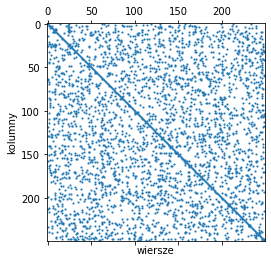

In [53]:
np.random.seed(12345)
matrixSize = 250
np.random.seed(42)
U,_ = np.linalg.qr(np.random.rand(matrixSize,matrixSize))
S = np.diag([*range(1,matrixSize+1)])
A2=U@S@U.T
A2=A2/np.max(A2)

A2[A2 < 0.05] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix(A2)
plt.spy(spA,markersize=1)
plt.xlabel('wiersze')
plt.ylabel('kolumny')
plt.show()

In [54]:
  
counter = gmres_counter()
x_gm, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol, 
                                    callback=counter, maxiter=10000)

cnt=cg_counter()
x_cg, info = scipy.sparse.linalg.cg(spA, b, x0=x1, tol=tol,  
                                    callback=cnt)           

Text(0, 0.5, 'norma roznicy z kroku na krok')

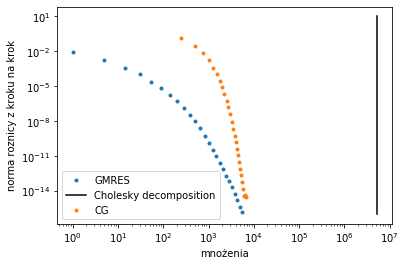

In [55]:
fig,ax = plt.subplots(1,1)
computation_gm = np.cumsum(np.array([*range(0,counter.niter)])**2)
computation_cg = (np.array([*range(0,cnt.niter)])*matrixSize)

ax.loglog(computation_gm,counter.callbacks,linestyle='none',marker='.',label='GMRES')
ax.loglog([1/3*matrixSize**3,1/3*matrixSize**3], [10,1e-16],c='black',label='Cholesky decomposition')
ax.loglog(computation_cg,cnt.callbacks,linestyle='none',marker='.',label='CG')

ax.legend()
ax.set_xlabel('mnożenia')
ax.set_ylabel('norma roznicy z kroku na krok')